Рассмотрим схему испытаний Бернулли (т.е. броски монет) с вероятностью успеха p. Построим несколько графиков априорного (сопряженное из теоретической задачи 8.4) распределения для разных параметров и объясним, как значения параметров априорного распределения соотносятся с априорными знаниями о монете.

Сопряженное распределение Beta($\alpha + \sum X_i, n + \beta - \sum X_i$).

In [2]:
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pylab
import seaborn as sns
%matplotlib inline

In [15]:
def do_apr(apriori_params):
    x = np.arange(0,1,0.005)
    fig = plt.figure(figsize=(14,7))
    for alpha, beta, label in apriori_params:
        plt.plot(x, stats.beta.pdf(x, alpha, beta), label=r'$Beta('+str(alpha)+", "+str(beta)+')$'+ label)
    plt.xlabel("x")
    plt.legend(fontsize=10,loc=2)
    plt.ylabel("density")
    plt.show()

Заметим, что если сравнить правдоподобия бернулиевского и бета распределения: $p^{\sum X_i}(1 - p)^{n - \sum{}X_i}$ и
$\frac{x^{\alpha-1}(1-x)^{\beta - 1}}{B(\alpha,\beta)}$, видно что $\alpha$ пропорционален количеству успехов, а $\beta$ количеству неудачных бросков.

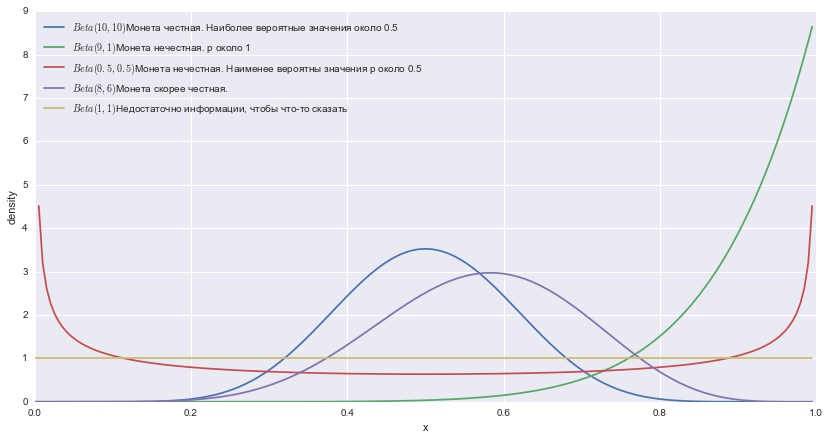

In [16]:
do_apr([
        (10,10, "Монета честная. Наиболее вероятные значения около 0.5"), 
        (9,1, "Монета нечестная. p около 1"), 
        (0.5,0.5, "Монета нечестная. Наименее вероятны значения р около 0.5"), 
        (8,6, "Монета скорее честная."),
        (1,1, "Недостаточно информации, чтобы что-то сказать")
    ])

Проведем по 20 бросков для разных монет и найдем байесовские оценки вероятности выпадения герба при различных параметрах априорного распределения, при которых получаются разные интерпретации априорных знаний (достаточно трех пар). 
Построем графики абсолютных величин отклонений оценок, построенных по выборке $X_1, . . . , X_n$ (n ≤ 20), от
истинных значений параметра в зависимости от n (для разных p разные графики). 
Так же я буду проводить для каждой p по 100 бросков, с теми же параметрами.

Метод максимального правдоподобия: $p^* = {\bar X \over m}$, при фиксированном m.

In [70]:
def bayesian_estim(alpha,beta):
    return (lambda X: (alpha + np.sum(X)) / (alpha + beta + len(X)), "bayes apriori: B(" + str(alpha) + "," + str(beta) + ")")
def likehood_estim():
    return (lambda X: np.average(X), "maximum likehood")
N = 20

In [85]:
def do_task(N, p, functions,ylim=0.5):
    sample = stats.binom.rvs(1,p,size=N)
    x = np.arange(0, N, 1)
    fig = plt.figure(figsize=(14,7))
    y = np.zeros(N)
    for func, label in functions:
        for n in range(N):
            y[n] = np.abs(func(sample[:(n + 1)]) - p)
        plt.plot(x, y, label= "Estimation:" + label)
    pylab.ylim(0, ylim)
    plt.xlabel("n")
    plt.ylabel("values")
    plt.title("Abs difference between estimations and real value p="+ str(p))
    plt.legend(fontsize=10, loc=2)
    plt.show()

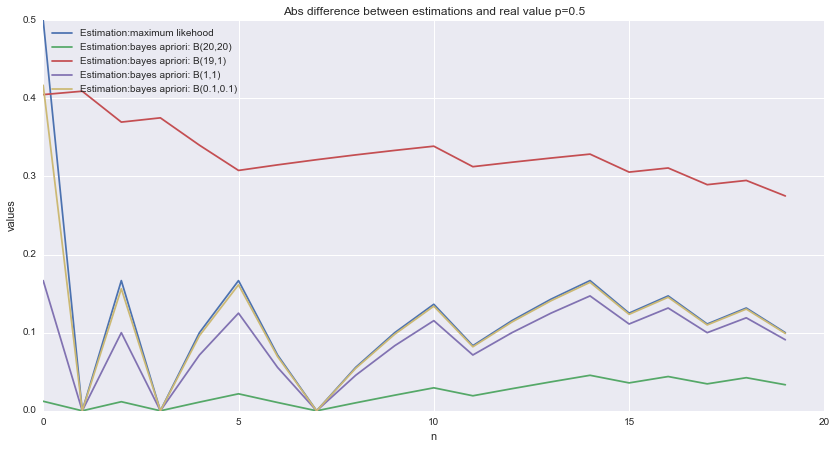

In [88]:
do_task(20, 0.5, [
        likehood_estim(),
        bayesian_estim(20,20),
        bayesian_estim(19,1),
        bayesian_estim(1,1),
        bayesian_estim(0.1,0.1)
    ] )

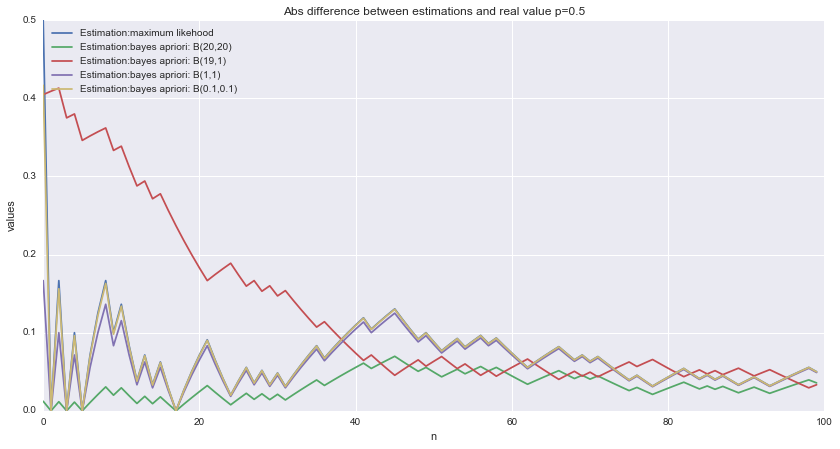

In [89]:
do_task(100, 0.5, [
        likehood_estim(),
        bayesian_estim(20,20),
        bayesian_estim(19,1),
        bayesian_estim(1,1),
        bayesian_estim(0.1,0.1)
    ] )

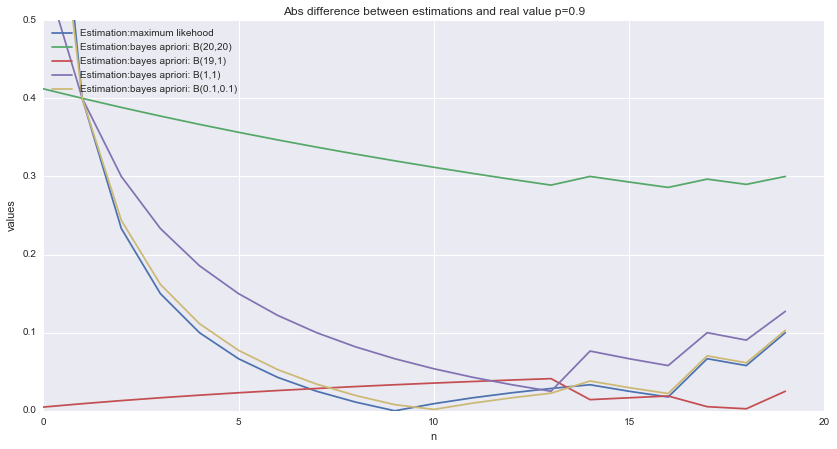

In [93]:
do_task(20, 0.9, [
        likehood_estim(),
        bayesian_estim(20,20), 
        bayesian_estim(19,1),
        bayesian_estim(1,1), 
        bayesian_estim(0.1,0.1)
    ])

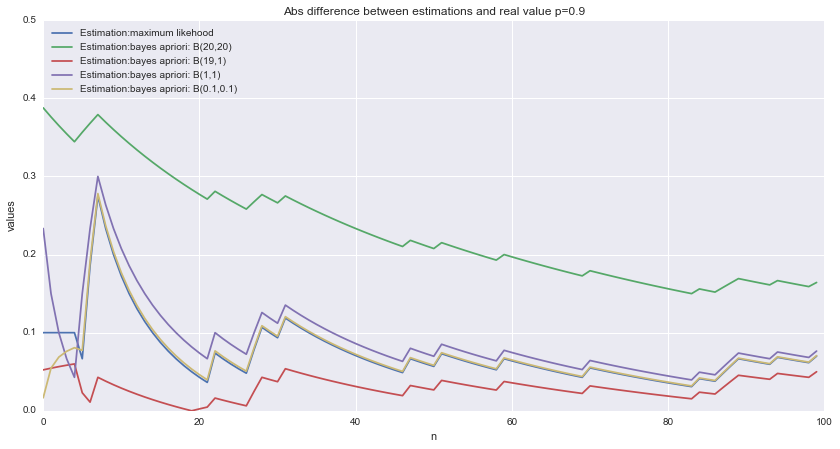

In [94]:
do_task(100, 0.9, [
        likehood_estim(),
        bayesian_estim(20,20),
        bayesian_estim(19,1), 
        bayesian_estim(1,1),
        bayesian_estim(0.1,0.1)
    ])

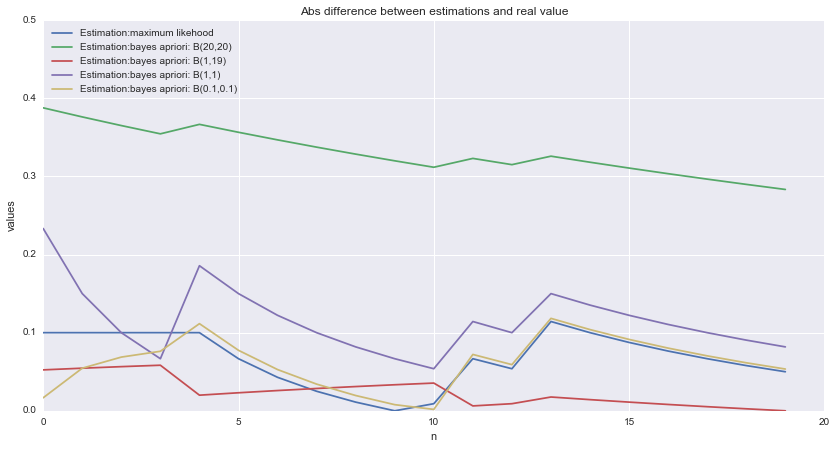

In [76]:
do_task(20, 0.1, [
        likehood_estim(),
        bayesian_estim(20,20),
        bayesian_estim(1,19),
        bayesian_estim(1,1),
        bayesian_estim(0.1,0.1)
    ])

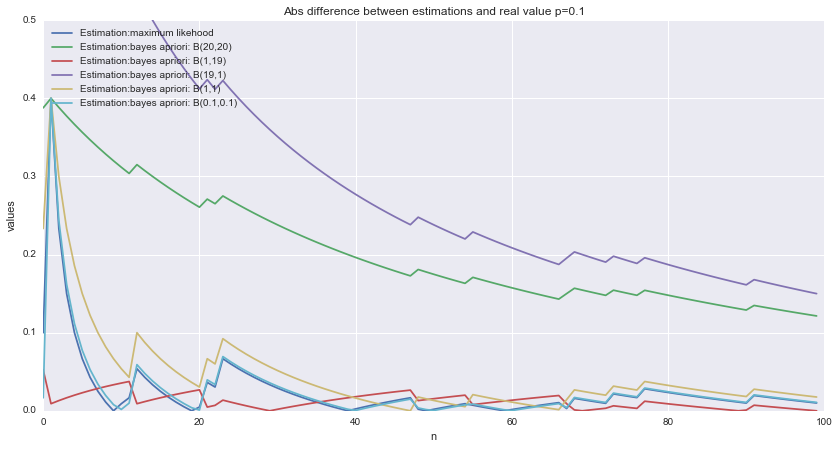

In [95]:
do_task(100, 0.1, [
        likehood_estim(),
        bayesian_estim(20,20), 
        bayesian_estim(1,19), 
        bayesian_estim(19,1), 
        bayesian_estim(1,1),
        bayesian_estim(0.1,0.1)
    ])

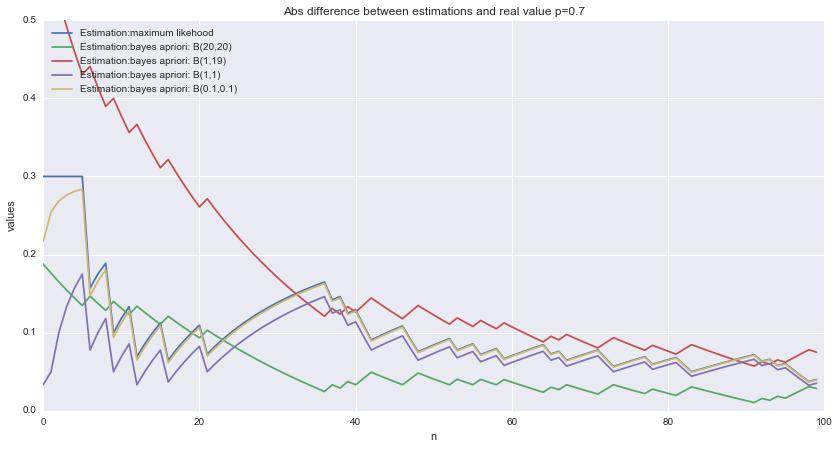

In [96]:
do_task(100, 0.7, [
        likehood_estim(),
        bayesian_estim(20,20), 
        bayesian_estim(1,19),
        bayesian_estim(1,1), 
        bayesian_estim(0.1,0.1)
    ])

### Вывод. По графикам видно, что если параметры априорного распределения выбраны правильно(честная монета $p=0.5$ $\alpha = 20$, $\beta = 20$; $p=0.9$ $\alpha = 19$ $\beta = 1$), то у этой оценки наблюдается сходимость значительно быстрее чем у остальных, и наоборот, если параметры выбраны неудачно$(\alpha = 19, \beta = 1)$ при $p = 0.1$, то скорость сходимости медленная. Оценка максимального правдоподобия всегда сходится с хорошей скоростью, медленнее, чем если выбрать удачные параметры.